In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import decimal
import math
from datetime import datetime as dt
from datetime import timedelta
from tqdm import tqdm

import os

# Data Review

In [63]:
file_list = list(os.listdir('D:/Working_Place/new_ssg/Data/(all) POS영수증(202101)'))
pos = []
for filename in file_list:
    if 'POS' in filename:
        pos.append(filename)
pos

['POS영수증(201801).csv',
 'POS영수증(201802).csv',
 'POS영수증(201803).csv',
 'POS영수증(201804).csv',
 'POS영수증(201805).csv',
 'POS영수증(201806).csv',
 'POS영수증(201807).csv',
 'POS영수증(201808).csv',
 'POS영수증(201809).csv',
 'POS영수증(201810).csv',
 'POS영수증(201811).csv',
 'POS영수증(201812).csv',
 'POS영수증(201901).csv',
 'POS영수증(201902).csv',
 'POS영수증(201903).csv',
 'POS영수증(201904).csv',
 'POS영수증(201905).csv',
 'POS영수증(201906).csv',
 'POS영수증(201907).csv',
 'POS영수증(201908).csv',
 'POS영수증(201909).csv',
 'POS영수증(201910).csv',
 'POS영수증(201911).csv',
 'POS영수증(201912).csv',
 'POS영수증(202001).csv',
 'POS영수증(202002).csv',
 'POS영수증(202003).csv',
 'POS영수증(202004).csv',
 'POS영수증(202005).csv',
 'POS영수증(202006).csv',
 'POS영수증(202007).csv',
 'POS영수증(202008).csv',
 'POS영수증(202009).csv',
 'POS영수증(202010).csv',
 'POS영수증(202011).csv',
 'POS영수증(202012).csv',
 'POS영수증(202101).csv',
 'POS영수증(202102).csv',
 'POS영수증(202103).csv',
 'POS영수증(202104).csv',
 'POS영수증(202105).csv',
 'POS영수증(202106).csv',
 'POS영수증(202107).csv',
 'POS영수증(20

In [64]:
data_samples = []
for file in tqdm(pos):
    each_data = pd.read_csv('D:/Working_Place/new_ssg/Data/(all) POS영수증(202101)/'+file)
    each_data_sampled = each_data.sample(frac=0.01)
    data_samples.append(each_data_sampled)
    del each_data
    del each_data_sampled

100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [00:40<00:00,  1.10it/s]


In [65]:
pos_sample = pd.concat(data_samples)
del data_samples
pos_sample

,OCCDATE,STORECD,POSNO,TRADE_NO,ITEM_SEQ,SALETIME,TRADE_TYPE,SKUCD,REVN_QTY,REVN_AMT,ENURI_GB,ENURI_AMT,SPRC,MRGNRATE
1348441,20180129,2008,4021,5067,4,184355,0,2480090000000,1,9900,0,0,9900,0.00
1007480,20180121,2314,6134,2096,3,202628,0,2500000147739,1,2980,0,0,2980,26.85
137572,20180103,2409,4795,2162,6,202248,0,8801157492289,1,2950,0,0,2950,38.47
995775,20180121,2008,4021,1103,2,130344,0,9555319109605,1,980,0,0,980,26.03
1042762,20180122,2008,4027,4375,13,110314,0,8801114131978,-1,-1950,1,-200,1950,25.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494784,20210812,2415,7601,6257,3,160553,0,8801001237233,2,600,0,0,300,44.63
525954,20210813,2330,6423,5630,8,184426,0,8801551102012,1,1500,0,0,1500,47.20
712104,20210817,2314,7602,1266,2,155932,0,8809007851446,1,4180,0,0,4180,34.78
407541,20210810,2330,6423,4500,5,204221,0,8801114303580,1,6980,0,0,6980,29.00


In [19]:
pos_sample.dtypes

OCCDATE         int64
STORECD         int64
POSNO           int64
TRADE_NO        int64
ITEM_SEQ        int64
SALETIME        int64
TRADE_TYPE      int64
SKUCD           int64
REVN_QTY        int64
REVN_AMT        int64
ENURI_GB        int64
ENURI_AMT       int64
SPRC            int64
MRGNRATE      float64
dtype: object

In [66]:
pos_sample = pos_sample.astype({'OCCDATE':str,
                                'STORECD':str,
                               'POSNO':str,
                                'TRADE_NO':str,
                                'SALETIME':str,
                                'TRADE_TYPE':str,
                                'SKUCD':str,
                                'ENURI_GB':str})

## OCCDATE

In [67]:
'123'+'456'

'123456'

In [68]:
pos_sample['POS_DATETIME'] = pos_sample['OCCDATE']+pos_sample['SALETIME']
pos_sample['POS_DATETIME'] = pd.to_datetime(pos_sample['POS_DATETIME'],format='%Y%m%d%H%M%S')
pos_sample

,OCCDATE,STORECD,POSNO,TRADE_NO,ITEM_SEQ,SALETIME,TRADE_TYPE,SKUCD,REVN_QTY,REVN_AMT,ENURI_GB,ENURI_AMT,SPRC,MRGNRATE,POS_DATETIME
1348441,20180129,2008,4021,5067,4,184355,0,2480090000000,1,9900,0,0,9900,0.00,2018-01-29 18:43:55
1007480,20180121,2314,6134,2096,3,202628,0,2500000147739,1,2980,0,0,2980,26.85,2018-01-21 20:26:28
137572,20180103,2409,4795,2162,6,202248,0,8801157492289,1,2950,0,0,2950,38.47,2018-01-03 20:22:48
995775,20180121,2008,4021,1103,2,130344,0,9555319109605,1,980,0,0,980,26.03,2018-01-21 13:03:44
1042762,20180122,2008,4027,4375,13,110314,0,8801114131978,-1,-1950,1,-200,1950,25.69,2018-01-22 11:03:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494784,20210812,2415,7601,6257,3,160553,0,8801001237233,2,600,0,0,300,44.63,2021-08-12 16:05:53
525954,20210813,2330,6423,5630,8,184426,0,8801551102012,1,1500,0,0,1500,47.20,2021-08-13 18:44:26
712104,20210817,2314,7602,1266,2,155932,0,8809007851446,1,4180,0,0,4180,34.78,2021-08-17 15:59:32
407541,20210810,2330,6423,4500,5,204221,0,8801114303580,1,6980,0,0,6980,29.00,2021-08-10 20:42:21


<AxesSubplot:xlabel='OCCDATE,OCCDATE'>

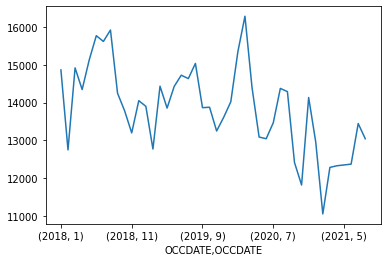

In [47]:
pos_sample.groupby([pos_sample.OCCDATE.dt.year,
                   pos_sample.OCCDATE.dt.month]).agg({'TRADE_NO':'count',
                                                    'REVN_AMT':'sum'})['TRADE_NO'].plot()

<AxesSubplot:xlabel='OCCDATE,OCCDATE'>

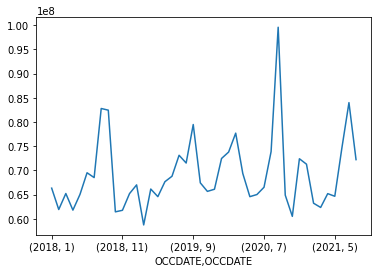

In [48]:
pos_sample.groupby([pos_sample.OCCDATE.dt.year,
                   pos_sample.OCCDATE.dt.month]).agg({'TRADE_NO':'count',
                                                    'REVN_AMT':'sum'})['REVN_AMT'].plot()

## STORECD

<AxesSubplot:xlabel='STORECD'>

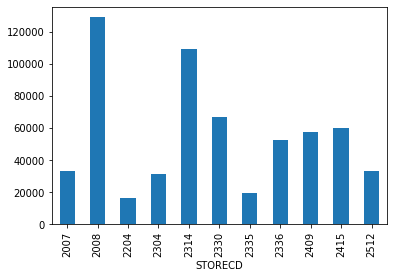

In [50]:
pos_sample.groupby([pos_sample.STORECD]).agg({'TRADE_NO':'count','REVN_AMT':'sum'})['TRADE_NO'].plot(kind='bar')

<AxesSubplot:xlabel='STORECD'>

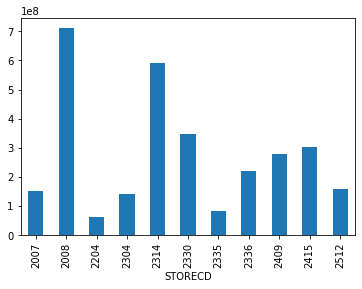

In [51]:
pos_sample.groupby([pos_sample.STORECD]).agg({'TRADE_NO':'count','REVN_AMT':'sum'})['REVN_AMT'].plot(kind='bar')

## SALETIME

<AxesSubplot:xlabel='POS_DATETIME,POS_DATETIME'>

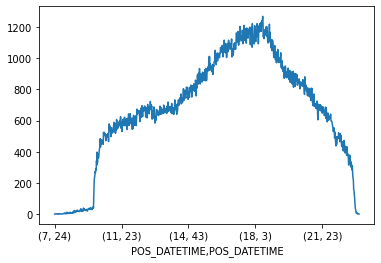

In [69]:
pos_sample.groupby([pos_sample.POS_DATETIME.dt.hour,
                   pos_sample.POS_DATETIME.dt.minute]).agg({'TRADE_NO':'count',
                                                            'REVN_AMT':'sum'})['TRADE_NO'].plot()

<AxesSubplot:xlabel='POS_DATETIME,POS_DATETIME'>

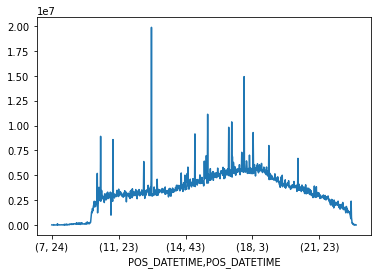

In [70]:
pos_sample.groupby([pos_sample.POS_DATETIME.dt.hour,
                   pos_sample.POS_DATETIME.dt.minute]).agg({'TRADE_NO':'count',
                                                            'REVN_AMT':'sum'})['REVN_AMT'].plot()

## ENURI_GB

<AxesSubplot:xlabel='ENURI_GB'>

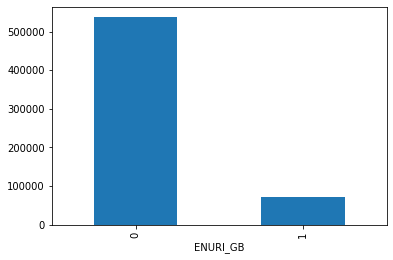

In [75]:
pos_sample.groupby(pos_sample.ENURI_GB).agg({'TRADE_NO':'count','REVN_AMT':'sum'})['TRADE_NO'].plot(kind='bar')

<AxesSubplot:xlabel='ENURI_GB'>

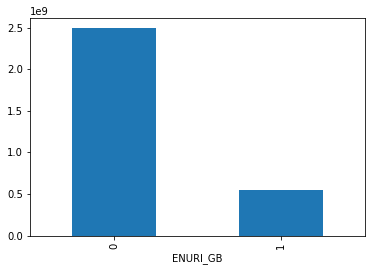

In [76]:
pos_sample.groupby(pos_sample.ENURI_GB).agg({'TRADE_NO':'count','REVN_AMT':'sum'})['REVN_AMT'].plot(kind='bar')

<AxesSubplot:xlabel='ENURI_GB'>

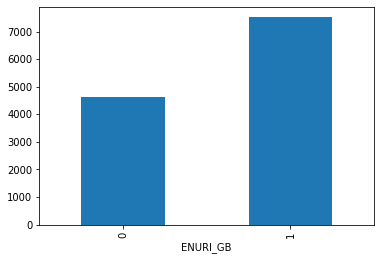

In [77]:
pos_sample.groupby(pos_sample.ENURI_GB).agg({'TRADE_NO':'count','REVN_AMT':'mean'})['REVN_AMT'].plot(kind='bar')

## SKUCD

In [81]:
pos_sample.SKUCD.unique(),len(pos_sample.SKUCD.unique())

(array(['2480090000000', '2500000147739', '8801157492289', ...,
        '8886015428136', '8809076870683', '8806075807306'], dtype=object),
 19259)

In [83]:
len('2480090000000')

13

In [168]:
pos_sample[pos_sample.SKUCD.str.len()!=13]

,OCCDATE,STORECD,POSNO,TRADE_NO,ITEM_SEQ,SALETIME,TRADE_TYPE,SKUCD,REVN_QTY,REVN_AMT,ENURI_GB,ENURI_AMT,SPRC,MRGNRATE,POS_DATETIME
485832,20180110,2330,6423,1107,1,102421,0,88004471,1,3000,0,0,3000,24.39,2018-01-10 10:24:21
170525,20180104,2314,6134,3403,7,172630,0,51934700252,1,5980,1,2000,5980,52.87,2018-01-04 17:26:30
344181,20180107,2336,6681,1349,2,155948,0,80974482,1,950,0,0,950,32.49,2018-01-07 15:59:48
1016316,20180121,2335,6641,5424,1,220453,0,88011967,2,9000,0,0,4500,9.56,2018-01-21 22:04:53
230195,20180105,2330,6422,7298,11,183625,0,786150000236,1,2500,0,0,2500,14.95,2018-01-05 18:36:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891960,20210821,2314,7601,2136,1,173339,0,786150000236,2,4400,0,0,2200,7.00,2021-08-21 17:33:39
454844,20210811,2336,6681,3118,12,184423,0,9800800056,1,2000,0,0,2000,33.45,2021-08-11 18:44:23
171008,20210804,2512,4923,1639,1,220003,0,88020020,1,4500,0,0,4500,8.99,2021-08-04 22:00:03
572098,20210814,2314,7601,9639,1,171332,0,602755001013,3,14940,1,5040,4980,6.92,2021-08-14 17:13:32


In [157]:
items = pd.read_csv('D:/Working_Place/new_ssg/Data/상품마스터데이터 (Product Master Data; ZIP PW 1234)/02.MTSKD_BIZTP(UTF-8).csv',
                   dtype={'상품코드':str,'상품명':str,'소분류코드':str,'아이템 코드':str})
items

,상품코드,상품구분코드(PL구분),상품명,소분류코드,메이커코드,과면세구분코드,최초등록일자,매입형태코드,발주단위,브랜드코드,...,상품구분코드,소싱구분,매입경로,BOX입수,아이템 코드,사이즈코드,칼라코드,시즌코드,상품운영상태코드,신상품구분코드
0,0000001801828,0,버드와이져 캔 473ml,0080,NaN,1,20171206,1.0,1,0.0,...,1,0,0,24.0,11469325,NaN,NaN,NaN,50.0,1.0
1,0000001801859,0,버드와이져 355ML(수입),0080,NaN,1,20170620,1.0,1,0.0,...,1,0,0,24.0,11462213,NaN,NaN,NaN,30.0,1.0
2,0000003424005,0,롯데 허쉬밀크초콜릿 40g,0022,NaN,1,20110401,1.0,1,NaN,...,1,0,1,48.0,11167737,NaN,NaN,NaN,30.0,1.0
3,0000003424102,0,롯데 허쉬아몬드초콜릿40G,0022,NaN,1,20110405,1.0,1,NaN,...,1,0,1,48.0,11054297,NaN,NaN,NaN,30.0,1.0
4,0000003424704,0,PO)허쉬왓차마콜잇45G,0022,NaN,1,20110405,1.0,1,NaN,...,1,0,1,48.0,11138821,NaN,NaN,NaN,80.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119654,8809520421270,0,양은양수냄비 18cm,0683,NaN,1,20170125,1.0,1,0.0,...,1,0,1,5.0,11455617,NaN,NaN,NaN,80.0,1.0
119655,8809520421287,0,편수냄비 18cm,0683,NaN,1,20170125,1.0,1,0.0,...,1,0,1,5.0,11455618,NaN,NaN,NaN,80.0,1.0
119656,8809520421324,0,미니삼겹살구이팬,0586,NaN,1,20170125,1.0,1,0.0,...,1,0,1,5.0,11455628,NaN,NaN,NaN,80.0,1.0
119657,8809520421379,0,마이보틀,0422,NaN,1,20170209,1.0,1,0.0,...,1,0,1,4.0,11456270,NaN,NaN,NaN,70.0,1.0


In [160]:
drop_index=items[items.상품코드.str.len()!=13].index
drop_index
items.drop(drop_index,inplace=True)


Int64Index([12744, 76429], dtype='int64')

In [161]:
items[items.상품코드.str.len()!=13]

,상품코드,상품구분코드(PL구분),상품명,소분류코드,메이커코드,과면세구분코드,최초등록일자,매입형태코드,발주단위,브랜드코드,...,상품구분코드,소싱구분,매입경로,BOX입수,아이템 코드,사이즈코드,칼라코드,시즌코드,상품운영상태코드,신상품구분코드


In [174]:
def making_13_str(skucd):
    if type(skucd)!=str:
        print('This is not a string')
        return skucd
    elif len(skucd)<=13:
        return '0'*(13-len(skucd))+skucd
    else:
        print('This is a string with length over 13')
        return skucd

In [175]:
pos_sample['SKUCD'] = pos_sample['SKUCD'].map(lambda x: making_13_str(x))
pos_sample

,OCCDATE,STORECD,POSNO,TRADE_NO,ITEM_SEQ,SALETIME,TRADE_TYPE,SKUCD,REVN_QTY,REVN_AMT,ENURI_GB,ENURI_AMT,SPRC,MRGNRATE,POS_DATETIME
1348441,20180129,2008,4021,5067,4,184355,0,2480090000000,1,9900,0,0,9900,0.00,2018-01-29 18:43:55
1007480,20180121,2314,6134,2096,3,202628,0,2500000147739,1,2980,0,0,2980,26.85,2018-01-21 20:26:28
137572,20180103,2409,4795,2162,6,202248,0,8801157492289,1,2950,0,0,2950,38.47,2018-01-03 20:22:48
995775,20180121,2008,4021,1103,2,130344,0,9555319109605,1,980,0,0,980,26.03,2018-01-21 13:03:44
1042762,20180122,2008,4027,4375,13,110314,0,8801114131978,-1,-1950,1,-200,1950,25.69,2018-01-22 11:03:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494784,20210812,2415,7601,6257,3,160553,0,8801001237233,2,600,0,0,300,44.63,2021-08-12 16:05:53
525954,20210813,2330,6423,5630,8,184426,0,8801551102012,1,1500,0,0,1500,47.20,2021-08-13 18:44:26
712104,20210817,2314,7602,1266,2,155932,0,8809007851446,1,4180,0,0,4180,34.78,2021-08-17 15:59:32
407541,20210810,2330,6423,4500,5,204221,0,8801114303580,1,6980,0,0,6980,29.00,2021-08-10 20:42:21


In [189]:
dontknow_skucd=[]
items_skucd_list=np.array(items.상품코드)
for i in tqdm(pos_sample.SKUCD):
    if i not in items_skucd_list:
        dontknow_skucd.append(i)
print(len(dontknow_skucd))

100%|█████████████████████████████████████████████████████████████████████████| 609505/609505 [16:39<00:00, 609.53it/s]

0


In [197]:
pos_sample_groupby_SKUCD = pos_sample.groupby('SKUCD').agg({'REVN_QTY':['count','sum','mean'],
                                                           'REVN_AMT':['sum','mean'],
                                                           'SPRC':'mean',
                                                           'MRGNRATE':'mean'})
pos_sample_groupby_SKUCD

REVN_QTY                REVN_AMT                       SPRC  \
                 count  sum      mean      sum          mean         mean   
SKUCD                                                                       
0000000015345        1    3  3.000000    14940  14940.000000  4980.000000   
0000001801828       93  196  2.107527   484030   5204.623656  2494.301075   
0000001801859       52  145  2.788462   214030   4115.961538  1532.692308   
0000003424005       70  122  1.742857   130600   1865.714286  1056.000000   
0000003424102       35   47  1.342857    50860   1453.142857  1070.857143   
...                ...  ...       ...      ...           ...          ...   
9556437014635       24   23  0.958333    23000    958.333333  1000.000000   
9556995200327       19   21  1.105263    89780   4725.263158  4305.263158   
9556995202055       28   32  1.142857    39480   1410.000000  1231.428571   
9556995202871       11   24  2.181818    24500   2227.272727  1045.454545   
9788984165984        1    1  1.000000     6000   6000.000000  6000.000000   

                MRGNRATE  
                    mean  
SKUCD                     
0000000015345   6.920000  
0000001801828  15.602258  
0000001801859   8.733462  
0000003424005  35.440000  
0000003424102  36.062857  
...                  ...  
9556437014635  33.000000  
9556995200327  27.179474  
9556995202055  44.445357  
9556995202871  36.320000  
9788984165984  30.000000  

[19259 rows x 7 columns]

In [199]:
pos_sample_groupby_SKUCD['REVN_QTY','sum'].idxmax(),pos_sample_groupby_SKUCD['REVN_AMT','sum'].idxmax()

('2000000412900', '2500000084744')

In [200]:
items[items.상품코드=='2000000412900']

,상품코드,상품구분코드(PL구분),상품명,소분류코드,메이커코드,과면세구분코드,최초등록일자,매입형태코드,발주단위,브랜드코드,...,상품구분코드,소싱구분,매입경로,BOX입수,아이템 코드,사이즈코드,칼라코드,시즌코드,상품운영상태코드,신상품구분코드
7622,2000000412900,0,신)소주(청하.백세주),9190,NaN,0,20161223,1.0,1,0.0,...,1,0,0,1.0,11441047,NaN,NaN,NaN,50.0,1.0


In [201]:
items[items.상품코드=='2500000084744']

,상품코드,상품구분코드(PL구분),상품명,소분류코드,메이커코드,과면세구분코드,최초등록일자,매입형태코드,발주단위,브랜드코드,...,상품구분코드,소싱구분,매입경로,BOX입수,아이템 코드,사이즈코드,칼라코드,시즌코드,상품운영상태코드,신상품구분코드
13731,2500000084744,0,(S)농협안심한우갈비2호,5246,NaN,0,20161216,1.0,6,0.0,...,6,0,1,1.0,11471213,NaN,NaN,NaN,50.0,1.0


In [209]:
skucd_to_name = []
for i in tqdm(pos_sample_groupby_SKUCD.index):
    skucd_name = items[items.상품코드==i].상품명.iloc[0]
    skucd_to_name.append(skucd_name)

100%|███████████████████████████████████████████████████████████████████████████| 19259/19259 [01:50<00:00, 173.71it/s]


In [210]:
pos_sample_groupby_SKUCD.index=skucd_to_name
pos_sample_groupby_SKUCD

REVN_QTY                REVN_AMT                \
                         count  sum      mean      sum          mean   
시에라네바다 완더랜                   1    3  3.000000    14940  14940.000000   
버드와이져 캔 473ml               93  196  2.107527   484030   5204.623656   
버드와이져 355ML(수입)             52  145  2.788462   214030   4115.961538   
롯데 허쉬밀크초콜릿 40g              70  122  1.742857   130600   1865.714286   
롯데 허쉬아몬드초콜릿40G              35   47  1.342857    50860   1453.142857   
...                        ...  ...       ...      ...           ...   
오키오 복숭아 구미 100g             24   23  0.958333    23000    958.333333   
화이트캐슬데니쉬버터쿠키454g            19   21  1.105263    89780   4725.263158   
화이트캐슬버터쿠키125g               28   32  1.142857    39480   1410.000000   
화이트캐슬초코칩쿠키125g              11   24  2.181818    24500   2227.272727   
신세계)포켓몬스터 베스트위시스티커색칠북        1    1  1.000000     6000   6000.000000   

                              SPRC   MRGNRATE  
                              mean       mean  
시에라네바다 완더랜             4980.000000   6.920000  
버드와이져 캔 473ml          2494.301075  15.602258  
버드와이져 355ML(수입)        1532.692308   8.733462  
롯데 허쉬밀크초콜릿 40g         1056.000000  35.440000  
롯데 허쉬아몬드초콜릿40G         1070.857143  36.062857  
...                            ...        ...  
오키오 복숭아 구미 100g        1000.000000  33.000000  
화이트캐슬데니쉬버터쿠키454g       4305.263158  27.179474  
화이트캐슬버터쿠키125g          1231.428571  44.445357  
화이트캐슬초코칩쿠키125g         1045.454545  36.320000  
신세계)포켓몬스터 베스트위시스티커색칠북  6000.000000  30.000000  

[19259 rows x 7 columns]

In [211]:
pos_sample_groupby_SKUCD['REVN_QTY','sum'].nlargest(10)

신)소주(청하.백세주)      15981
재사용봉투20L          12563
삼다수 500ml         12218
삼다수 2L             9309
캔두 100             6024
베베숲센시티브 80매 캡      5184
종량제봉투20L           4217
동원샘물 2L            3916
(신)참이슬후레쉬360ml     3666
강원평창수 2L           3131
Name: (REVN_QTY, sum), dtype: int64

In [213]:
pos_sample_groupby_SKUCD['REVN_QTY','count'].nlargest(10)

재사용봉투20L             10892
신)소주(청하.백세주)          5152
쇼핑백                   2720
종량제봉투20L              2668
애호박 (국산/개)            2524
재사용봉투20L              2210
순수란30구(대란)            1990
Dole스위티오바나나(10CP)     1936
친환경팽이버섯(국산/봉)         1685
양배추(국산/통)             1654
Name: (REVN_QTY, count), dtype: int64

In [212]:
pos_sample_groupby_SKUCD['REVN_AMT','sum'].nlargest(10)

(S)농협안심한우갈비2호        17745000
베베숲센시티브 80매 캡        16342280
순수란30구(대란)           11453140
딸기(1Kg/박스)            9754620
삼다수 2L                9439520
리큐 액체세제3L용기(일반)       9217500
Dole스위티오바나나(10CP)     9131370
맥심 모카 250입            8612760
＊참농(수수료)              8294000
딸기(500g/팩)            7552170
Name: (REVN_AMT, sum), dtype: int64

In [215]:
items[items.상품명=='신)소주(청하.백세주)']

,상품코드,상품구분코드(PL구분),상품명,소분류코드,메이커코드,과면세구분코드,최초등록일자,매입형태코드,발주단위,브랜드코드,...,상품구분코드,소싱구분,매입경로,BOX입수,아이템 코드,사이즈코드,칼라코드,시즌코드,상품운영상태코드,신상품구분코드
7622,2000000412900,0,신)소주(청하.백세주),9190,NaN,0,20161223,1.0,1,0.0,...,1,0,0,1.0,11441047,NaN,NaN,NaN,50.0,1.0
